# Phase 1 & 2 project of Codes on Bytes

# Phase 1

## First importing all the required libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset - netflix1.csv')
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
data.shape

(8790, 10)

## Checking information of our dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


## Checking statistical summary of our data

In [5]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Checking all columns datatypes

In [6]:
data.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

- Here we found that the column named date_added is showing the datatype as object but should be in date format.

## Checking null values

In [7]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## Checking if any duplicate rows

In [8]:
data[data.duplicated()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


-  So, it means that there are no duplicated and no null values present into our data.

## Updating the date_added column datatype from object to datetime

In [9]:
data['date_added']= pd.to_datetime(data['date_added'])

In [10]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

- Now the respective column had been converted to datetime dtype

## Checking of outliers using Z-score into our data

In [11]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
Q1 = data['release_year'].quantile(0.25)
Q3 = data['release_year'].quantile(0.75)
Q1,Q3

(2013.0, 2019.0)

In [13]:
IQR = Q3 - Q1
IQR

6.0

In [14]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(2004.0, 2028.0)

In [15]:
data[(data.release_year<lower_limit)| (data.release_year>upper_limit)]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
29,s25,Movie,Jeans,S. Shankar,India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
51,s27,Movie,Minsara Kanavu,Rajiv Menon,India,2021-09-21,1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals"
53,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Not Given,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies"
60,s42,Movie,Jaws,Steven Spielberg,United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"
...,...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,Not Given,Hong Kong,2018-09-20,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies"
8743,s8524,TV Show,The Super Mario Bros. Super Show!,Not Given,United States,2016-05-22,1989,TV-Y7,1 Season,Kids' TV
8746,s8542,TV Show,The Twilight Zone (Original Series),Not Given,United States,2017-07-01,1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy"
8761,s8645,TV Show,Twin Peaks,Not Given,United States,2017-07-01,1990,TV-14,2 Seasons,"Classic & Cult TV, Crime TV Shows, TV Dramas"


## Outlier detection using boxplot

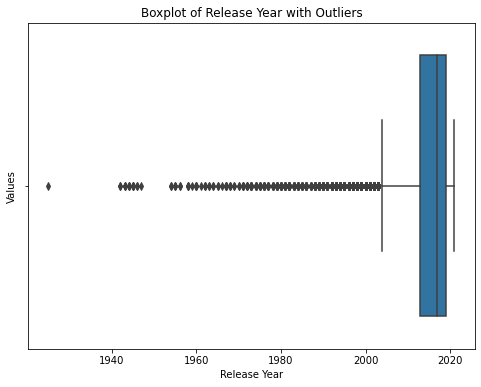

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['release_year'])
plt.xlabel('Release Year')
plt.ylabel('Values')
plt.title('Boxplot of Release Year with Outliers')
plt.show()

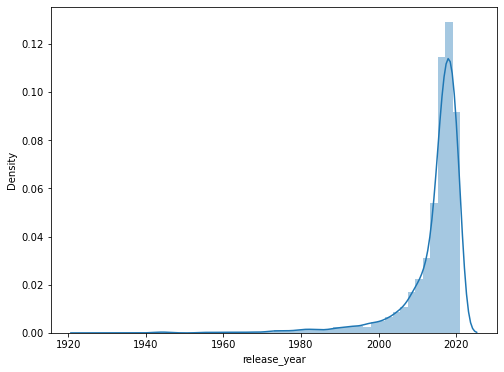

In [17]:
plt.figure(figsize=(8, 6))
sns.distplot(data['release_year'])
plt.show()

- Here we can clearly see that our data is left skewed and not in a normal distribution

## Removal of outliers

In [18]:
data_1 = data[(data.release_year>lower_limit) & (data.release_year<upper_limit)]
data_1

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


- Now all the outliers which were present into our release_year column are removed from our data.

# Phase 2 Project

# Visualization and Analysis

## Visualizing the distribution of release years

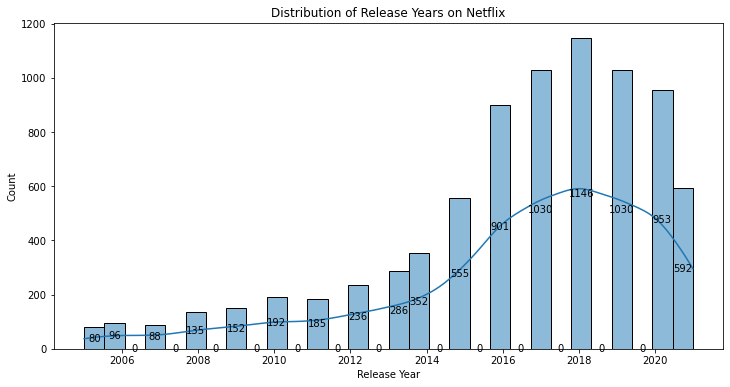

In [19]:
plt.figure(figsize=(12, 6))
ax=sns.histplot(data_1['release_year'], bins=30,kde=True)

ax.bar_label(ax.containers[0], fmt='%d', label_type='center') 

plt.title('Distribution of Release Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

- Interpretation: The majority of content on Netflix was released in recent years, indicating a focus on more recent content.


## Visualizing the distribution of ratings

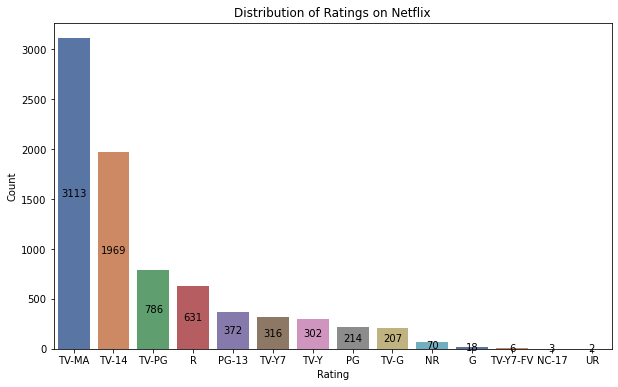

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating', data=data_1, order=data_1['rating'].value_counts().index,  palette='deep')

ax.bar_label(ax.containers[0], fmt='%d', label_type='center') 

plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- Interpretation: Most content on Netflix has a rating of 'TV-MA' and 'TV-14', suggesting that the platform may have a diverse range of audience preferences.

## Visualizing the number of movies and TV shows

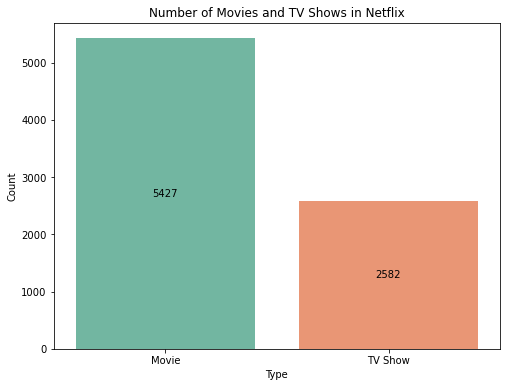

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.countplot( x='type',data=data_1, palette='Set2')

ax.bar_label(ax.containers[0], fmt='%d', label_type='center')  # Add data labels to the countplot

plt.title('Number of Movies and TV Shows in Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

 - Interpretation: Netflix has a higher number of movies compared to TV shows, indicating a larger collection of movies on the platform.

# Visualizing Countrywise

In [22]:
data_1['country'].value_counts().head(4)

United States     2838
India              918
United Kingdom     591
Pakistan           414
Name: country, dtype: int64

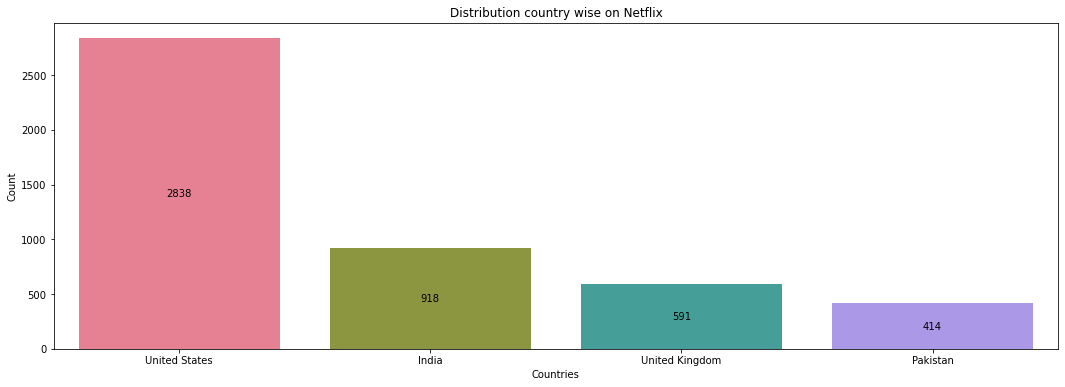

In [23]:
plt.figure(figsize=(18, 6))
ax=sns.countplot(data = data_1, x='country', order=data_1['country'].value_counts().index[0:4], palette='husl' )

ax.bar_label(ax.containers[0], fmt='%d', label_type='center') 

plt.title('Distribution country wise on Netflix')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

- Interpretation: USA is the leading country in the content type on Netflix. 

## Visualizing the distribution of TV show seasons

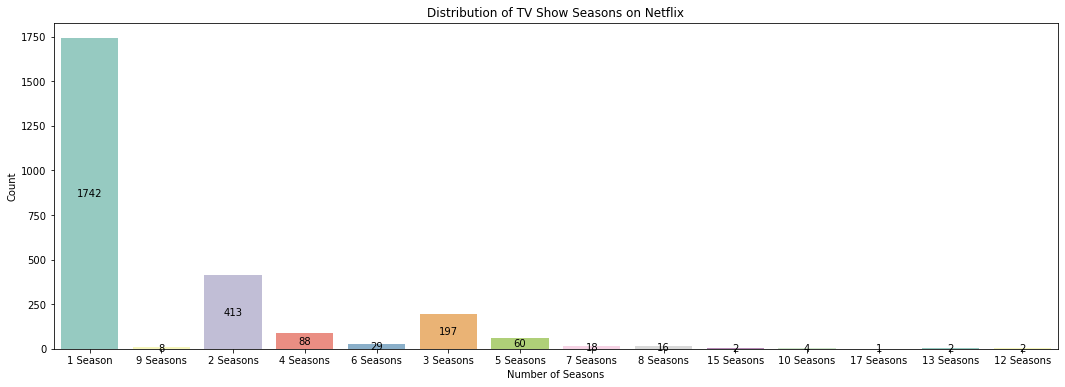

In [24]:
plt.figure(figsize=(18, 6))
ax=sns.countplot(x='duration', data=data_1[data_1['type'] == 'TV Show'],  palette='Set3')

ax.bar_label(ax.containers[0], fmt='%d', label_type='center') 

plt.title('Distribution of TV Show Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

- Interpretation: TV shows on Netflix typically have a few seasons, with a peak around 1 to 3 seasons. There are fewer TV shows with a higher number of seasons.

# Final Insights

- Interpretation: The majority of content on Netflix was released in recent years, indicating a focus on more recent content.

- Interpretation: Most content on Netflix has a rating of 'TV-MA' and 'TV-14', suggesting that the platform may have a diverse range of audience preferences.

- Interpretation: Netflix has a higher number of movies compared to TV shows, indicating a larger collection of movies on the platform.

- Interpretation: USA is the leading country in the content type on Netflix.

- Interpretation: TV shows on Netflix typically have a few seasons, with a peak around 1 to 3 seasons. Generally there are fewer TV shows with a higher number of seasons.

# ML modelling

## Dataset Loading

In [25]:
html_url = 'file:///C:/Users/Aadarsh/Desktop/Codes%20on%20bytes/train%20dataset%20-%20Google%20Drive.html'
tables = pd.read_html(html_url)
df = tables[0]
print(df)

     Unnamed: 0 Unnamed: 1   Unnamed: 2
0             1          x            y
1             2         24  21.54945196
2             3         50  47.46446305
3             4         15  17.21865634
4             5         38  36.58639803
..          ...        ...          ...
696         697         58  58.59500642
697         698         93  94.62509374
698         699         82  88.60376995
699         700         66  63.64868529
700         701         97   94.9752655

[701 rows x 3 columns]


## Removing first row as headers

In [26]:
html_file = 'file:///C:/Users/Aadarsh/Desktop/Codes%20on%20bytes/train%20dataset%20-%20Google%20Drive.html'
tables = pd.read_html(html_file, skiprows=1, header=0)
df = tables[0]
print(df)

       1     x          y
0      2  24.0  21.549452
1      3  50.0  47.464463
2      4  15.0  17.218656
3      5  38.0  36.586398
4      6  87.0  87.288984
..   ...   ...        ...
695  697  58.0  58.595006
696  698  93.0  94.625094
697  699  82.0  88.603770
698  700  66.0  63.648685
699  701  97.0  94.975266

[700 rows x 3 columns]


## Train dataset Loading

In [27]:
html_url = 'file:///C:/Users/Aadarsh/Desktop/Codes%20on%20bytes/test%20dataset%20-%20Google%20Drive.html'
tables = pd.read_html(html_url)
df1 = tables[0]
print(df1)

     Unnamed: 0 Unnamed: 1   Unnamed: 2
0             1          x            y
1             2         77  79.77515201
2             3         21  23.17727887
3             4         22  25.60926156
4             5         20  17.85738813
..          ...        ...          ...
296         297         71   68.5458879
297         298         46  47.33487629
298         299         55  54.09063686
299         300         62  63.29717058
300         301         47  52.45946688

[301 rows x 3 columns]


## Removing first row as headers

In [28]:
html_file = 'file:///C:/Users/Aadarsh/Desktop/Codes%20on%20bytes/test%20dataset%20-%20Google%20Drive.html'
tables = pd.read_html(html_file, skiprows=1, header=0)
df1 = tables[0]
print(df1)

       1   x          y
0      2  77  79.775152
1      3  21  23.177279
2      4  22  25.609262
3      5  20  17.857388
4      6  36  41.849864
..   ...  ..        ...
295  297  71  68.545888
296  298  46  47.334876
297  299  55  54.090637
298  300  62  63.297171
299  301  47  52.459467

[300 rows x 3 columns]


In [29]:
X=df.values
X

array([[  2.        ,  24.        ,  21.54945196],
       [  3.        ,  50.        ,  47.46446305],
       [  4.        ,  15.        ,  17.21865634],
       ...,
       [699.        ,  82.        ,  88.60376995],
       [700.        ,  66.        ,  63.64868529],
       [701.        ,  97.        ,  94.9752655 ]])

In [30]:
y=df1.values
y

array([[ 2.00000000e+00,  7.70000000e+01,  7.97751520e+01],
       [ 3.00000000e+00,  2.10000000e+01,  2.31772789e+01],
       [ 4.00000000e+00,  2.20000000e+01,  2.56092616e+01],
       [ 5.00000000e+00,  2.00000000e+01,  1.78573881e+01],
       [ 6.00000000e+00,  3.60000000e+01,  4.18498644e+01],
       [ 7.00000000e+00,  1.50000000e+01,  9.80523488e+00],
       [ 8.00000000e+00,  6.20000000e+01,  5.88746593e+01],
       [ 9.00000000e+00,  9.50000000e+01,  9.76179370e+01],
       [ 1.00000000e+01,  2.00000000e+01,  1.83951275e+01],
       [ 1.10000000e+01,  5.00000000e+00,  8.74674765e+00],
       [ 1.20000000e+01,  4.00000000e+00,  2.81141583e+00],
       [ 1.30000000e+01,  1.90000000e+01,  1.70953724e+01],
       [ 1.40000000e+01,  9.60000000e+01,  9.51490718e+01],
       [ 1.50000000e+01,  6.20000000e+01,  6.13880066e+01],
       [ 1.60000000e+01,  3.60000000e+01,  4.02470172e+01],
       [ 1.70000000e+01,  1.50000000e+01,  1.48224859e+01],
       [ 1.80000000e+01,  6.50000000e+01

## Splitting the data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
import numpy as np

# Check for NaN values in X_test
nan_indices = np.isnan(y_test)
nan_count = np.sum(nan_indices)

print("Number of NaN values in X_test:", nan_count)


Number of NaN values in X_test: 0


In [37]:
import numpy as np

# Finding indices of NaN values in X_test
nan_indices = np.isnan(X_test)

# Get the indices of rows containing NaN
rows_with_nan = np.any(nan_indices, axis=1)

# Drop rows with NaN values from X_test
X_test_no_nan = X_test[~rows_with_nan]

# Now, X_test_no_nan doesn't have rows with NaN values


In [38]:
from sklearn.impute import SimpleImputer

# Create an imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform X_test using the imputer
X_test = imputer.fit_transform(X_test)


In [39]:
# Check for infinity values in X_test
infinity_indices = np.isinf(X_test)
infinity_count = np.sum(infinity_indices)

print("Number of infinity values in X_test:", infinity_count)


Number of infinity values in X_test: 0


In [40]:
# Check data types of elements in X_test
print(X_test.dtype)


float64


In [41]:
print("Number of NaN values in y:", np.isnan(y).sum())
print("Number of infinity values in y:", np.isinf(y).sum())


Number of NaN values in y: 0
Number of infinity values in y: 0


In [42]:
y_pred = lr.predict(X_test)
y_pred

array([[  210.        ,    50.33008052,    50.49962555],
       [  190.        ,    50.01804247,    50.89080734],
       [   14.        ,    51.91485568,    52.56210833],
       [  223.        ,    50.34852907,    50.21438443],
       [  241.        ,    50.02769166,    50.37954328],
       [  138.        ,    52.92630032,    53.7170301 ],
       [  232.        ,    50.11873797,    49.51693236],
       [  208.        ,    48.21233361,    47.86767411],
       [   54.        ,    50.09712852,    50.34415676],
       [  110.        ,    50.45020898,    50.84443949],
       [  292.        ,    47.89683424,    47.93029672],
       [   17.        ,    53.67721567,    54.56473253],
       [  186.        ,    46.53801722,    45.48846985],
       [  250.        ,    50.38452744,    50.41785425],
       [   24.        ,    52.61549009,    52.91785483],
       [   76.        ,    49.9767281 ,    49.61367867],
       [  272.        ,    48.69950802,    48.56989435],
       [   92.        ,    50.5

In [43]:
y_test

array([[ 2.10000000e+02,  6.70000000e+01,  6.84882075e+01],
       [ 1.90000000e+02,  2.70000000e+01,  3.04941293e+01],
       [ 1.40000000e+01,  9.60000000e+01,  9.51490718e+01],
       [ 2.23000000e+02,  1.00000000e+02,  1.03526616e+02],
       [ 2.41000000e+02,  2.80000000e+01,  2.81566854e+01],
       [ 1.38000000e+02,  6.50000000e+01,  6.89469977e+01],
       [ 2.32000000e+02,  3.70000000e+01,  4.00070960e+01],
       [ 2.08000000e+02,  4.00000000e+01,  4.80984313e+01],
       [ 5.40000000e+01,  5.20000000e+01,  5.40817063e+01],
       [ 1.10000000e+02,  8.90000000e+01,  8.74572156e+01],
       [ 2.92000000e+02,  9.20000000e+01,  9.13086367e+01],
       [ 1.70000000e+01,  1.50000000e+01,  1.48224859e+01],
       [ 1.86000000e+02,  3.70000000e+01,  3.41247325e+01],
       [ 2.50000000e+02,  9.00000000e+01,  8.98999910e+01],
       [ 2.40000000e+01,  8.90000000e+01,  8.98263444e+01],
       [ 7.60000000e+01,  1.50000000e+01,  1.32569065e+01],
       [ 2.72000000e+02,  5.50000000e+01

In [44]:
print('Training Score:',lr.score(X_train,y_train))

Training Score: 0.3366900813389682


In [45]:
print('Testing score:',lr.score(X_test,y_test))

Testing score: -30.313999310179387
